In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from IPython import get_ipython
import math


get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
path = "/home/miguel/catkin_ws/src/simulation_files/saved_files_and_results/test_1/"
file = "amcl_marker"
file_2 = "_num_markers"
file_3 = "_num_particles"
file_4 = "_weight_sensor"
file_5 = "_marker_error"
type_file =".txt"
full_path = str(path + file + type_file)
full_path_2 = str(path + file  + file_2 + type_file)
full_path_3 = str(path + file  + file_3 + type_file)
full_path_4 = str(path + file  + file_4 + type_file)
full_path_5 = str(path + file  + file_5 + type_file)
full_path_5

'/home/miguel/catkin_ws/src/simulation_files/saved_files_and_results/test_1/amcl_marker_marker_error.txt'

In [3]:
data = pandas.read_csv(full_path, skipinitialspace = True)
data.head()

,Time,X position error,Y position error,Position error,YALL error,X deviation,Y deviation,YALL deviation,Mean deviation
0,4.499,0.012028,0.084929,0.085777,0.007748,0.454764,0.432897,0.130623,0.339428
1,5.991,0.029194,0.098104,0.102355,0.013598,0.393491,0.407696,0.114208,0.305132
2,7.488,0.011954,0.124561,0.125134,0.019809,0.385343,0.391461,0.111429,0.296078
3,8.987,0.003507,0.132729,0.132775,0.020195,0.381312,0.348491,0.106549,0.278784
4,10.418,0.002989,0.154985,0.155014,0.025290,0.389144,0.298150,0.097119,0.261471


In [4]:
data_2 = pandas.read_csv(full_path_2, skipinitialspace = True)
data_2.head()

,Time,Num Markers
0,0.080,1
1,0.181,1
2,0.283,1
3,0.390,1
4,0.481,1


In [5]:
data_3 = pandas.read_csv(full_path_3, skipinitialspace = True)
data_3.head()

,Time,Num Particles
0,0.008,1957
1,4.501,894
2,5.991,556
3,7.488,501
4,8.987,501


In [6]:
data_4 = pandas.read_csv(full_path_4, skipinitialspace = True)
data_4.head()

,Time,Weight Laser,Weight Marker
0,0.000,0,0.000000
1,4.498,0,5.697544
2,5.989,0,8.069903
3,7.487,0,5.502966
4,8.987,0,5.728953


In [7]:
data_5 = pandas.read_csv(full_path_5, skipinitialspace = True)
data_5.head()

,Time,Marker Error
0,0.000,0.000000
1,4.498,0.456909
2,5.989,0.216759
3,7.488,0.117402
4,8.987,0.099717


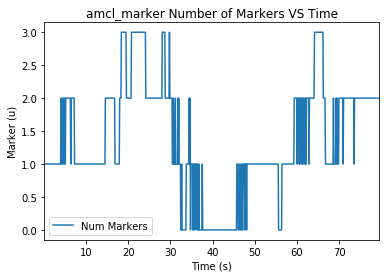

In [8]:
data_2.plot(kind = "line", x = "Time" ,y = {"Num Markers"})
plt.ylabel("Marker (u)")
plt.xlabel("Time (s)")
plt.title(file + " Number of Markers VS Time")
plt.savefig( file + "_num_markers.png")

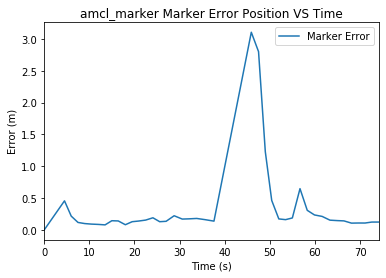

In [9]:
data_5.plot(kind = "line", x = "Time" ,y = {"Marker Error"})
plt.ylabel("Error (m)")
plt.xlabel("Time (s)")
plt.title(file + " Marker Error Position VS Time")
plt.savefig( file + "_marker_error_position.png")

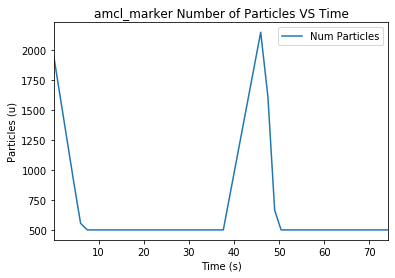

In [10]:
data_3.plot(kind = "line", x = "Time" ,y = {"Num Particles"})
plt.ylabel("Particles (u)")
plt.xlabel("Time (s)")
plt.title(file + " Number of Particles VS Time")
plt.savefig( file + "_num_particles.png")

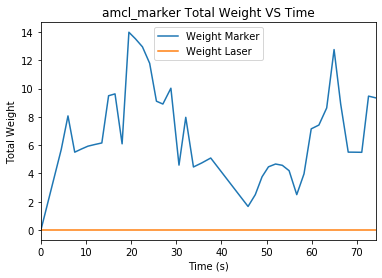

In [11]:
data_4.plot(kind = "line", x = "Time" ,y = {"Weight Laser", "Weight Marker"})
plt.ylabel("Total Weight")
plt.xlabel("Time (s)")
plt.title(file + " Total Weight VS Time")
plt.savefig( file + "_total_weight.png")

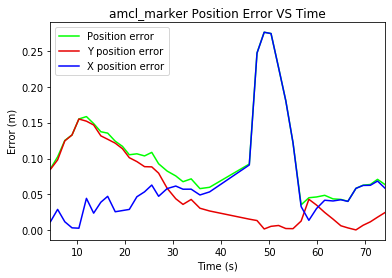

In [12]:
data.plot(kind = "line", x = "Time" ,y = {"X position error", "Y position error", "Position error"}, color = {(0.9,0.0,0.0), (0.0,1.0,0.0), (0.0,0.0,1.0)})
plt.ylabel("Error (m)")
plt.xlabel("Time (s)")
plt.title(file + " Position Error VS Time")
plt.savefig( file + "_position_error.png")

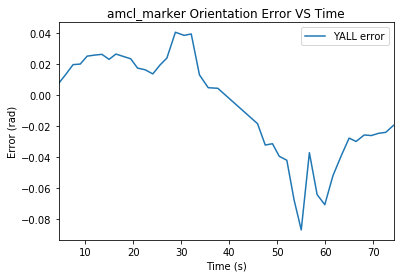

In [13]:
data.plot(kind = "line", x = "Time" ,y = {"YALL error"})
plt.ylabel("Error (rad)")
plt.xlabel("Time (s)")
plt.title(file + " Orientation Error VS Time")
plt.savefig(file + "_orientation_error.png")

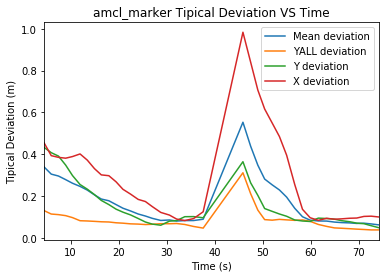

In [14]:
data.plot(kind = "line", x = "Time" ,y = {"X deviation", "Y deviation", "YALL deviation", "Mean deviation"})
plt.ylabel("Tipical Deviation (m)")
plt.xlabel("Time (s)")
plt.title(file + " Tipical Deviation VS Time")
plt.savefig(file + "_tipical_desviation.png")

In [15]:
mean_x_error = round(data["X position error"].mean(), 3)
mean_y_error = round(data["Y position error"].mean(), 3)
mean_pos_error = round(data["Position error"].mean(), 3)
mean_yall = round(data["YALL error"].abs().mean(), 3)
mean_x_covariance = round(data["X deviation"].mean(), 3)
mean_y_covariance = round(data["Y deviation"].mean(), 3)
mean_yall_covariance = round(data["YALL deviation"].mean(), 3)
mean_covariance = round(data["Mean deviation"].mean(), 3)
mean_weight_laser = round(data_4["Weight Laser"].mean(), 3)
mean_weight_marker = round(data_4["Weight Marker"].mean(), 3)
name_file = path + file + "_results.txt"
results = open(name_file, "w")
results.write("Mean laser weight: " + str(mean_weight_laser) + "\n")
results.write("Mean Marker weight: " + str(mean_weight_marker) + "\n")
results.write("Mean X position error: " + str(mean_x_error) + "\n")
results.write("Mean Y position error: " + str(mean_y_error) + "\n")
results.write("Mean Pos position error: " + str(mean_pos_error) + "\n")
results.write("Mean YALL error: " + str(mean_yall) + "\n")
results.write("Mean X deviation: " + str(mean_x_covariance) + "\n")
results.write("Mean Y deviation: " + str(mean_y_covariance) + "\n")
results.write("Mean YALL deviation: " + str(mean_yall_covariance) + "\n")
results.write("Mean deviation: " + str(mean_covariance) + "\n")
results.close()